In [7]:
# 한글 폰트 // 그림에서 한글이 깨지지 않게 폰트를 넣어준다.
# 틀을 만들어주는 하트 그림 (흑백)

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image # 이미지 데이터 불러오고 처리해주는 라이브러리

In [15]:
# 한국 검색 후 뉴스 페이지에 모든 페이지의 뉴스들 제목과 내용요약 크롤링
from tqdm import tqdm # for 문이 언제 끝나는지 알려줌

total=[]
for n in tqdm(range(1,3992,10)): # 페이지가 이동하는 방법
    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=41&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find('ul', class_="list_news").find_all("li",class_="bx" )


    for i in news:
        title = i.find('a',class_="news_tit").text
        content = i.find('a',class_="api_txt_lines dsc_txt_wrap").text 
        total.append([title,content])

    time.sleep(1)

100%|██████████| 400/400 [16:34<00:00,  2.49s/it]


In [16]:
len(total)

4000

In [17]:
df = pd.DataFrame(total,columns = ['title','content'])
df

,title,content
0,"한국노총 ""주말 전국노동자대회 취소""…세월호 사고 후 처음","한국노총이 31일 성명을 통해 ""11월 5일 예정됐던 전국노동자대회를 취소하기로 했..."
1,"대출로 연명…한국, 기업 부채 증가 속도 세계 2위",늘면서 한국의 정부 부채 증가 속도도 다른 나라들과 비교해 빠른 편이었다. 가계 부...
2,"미술 한류 붐 조성...국립현대미술관, 미국서 첫 '2022 한국미술주간'","위해 ‘한국미술주간’ 행사가 해외에서 첫 개최된다. 국립현대미술관(MMCA, 관장 ..."
3,한국시리즈 응원 최소화… 시구·앰프·치어리더·축포 없다,내일(11월 1일) 시작되는 키움과 SSG의 프로야구 한국시리즈에서 응원과 각종 행...
4,"美에 팔렸던 韓 벤처 1세대 VAN사, 다시 한국 품으로","신생 유니콘 한국신용데이터, 파이서브 코리아 인수 이니시스 설립한 권도균이 매각했던..."
...,...,...
3995,본지 신인섭 기자 ‘2022 한국편집상’,한국편집기자협회(회장 김창환)는 26일 중앙일보 신인섭(사진) 부장의 ‘누들플레이션...
3996,"[사진]플레이오프 4차전 MVP 푸이그,'이제 한국시리즈'",키움이 LG를 꺾고 한국시리즈에 진출했다. 키움은 28일 서울 고척 스카이돔에서 ...
3997,"윤 대통령, '세계 바이오 서밋' 개회사서 ""한국 생산 코로나 백신, 필요한 국...","필요하다""며 한국에서 생산한 코로나19 백신을 필요한 국가에 제공하겠다고 약속했다...."
3998,[포토S] 한국시리즈 진출 실패한 LG,2022 신한은행 SOL KBO 포스트시즌 키움 히어로즈와 LG 트윈스의 플레이오프...


In [19]:
# 크롤링한 텍스트를 한문장으로 만들어준다.

import re

text=''

for i in total:
    text += i[0]
    text += '\n'
    text += i[1]
    text += '\n'

print(len(text))
text

617754


'한국노총 "주말 전국노동자대회 취소"…세월호 사고 후 처음\n한국노총이 31일 성명을 통해 "11월 5일 예정됐던 전국노동자대회를 취소하기로 했다"고 밝혔다. 이태원 참사로 발생한 피해자들을 애도하기 위해서다. 한국노총 김동명 위원장은 31일 오전 열린 전간부회의에서 "믿을 수...\n대출로 연명…한국, 기업 부채 증가 속도 세계 2위\n늘면서 한국의 정부 부채 증가 속도도 다른 나라들과 비교해 빠른 편이었다. 가계 부채의 경우 감소세로 돌아섰지만, 국내총생산(GDP) 대비 가계 부채 비율은 여전히 세계 1위였다. 한국만 가계부채가 GDP보다...\n미술 한류 붐 조성...국립현대미술관, 미국서 첫 \'2022 한국미술주간\'\n위해 ‘한국미술주간’ 행사가 해외에서 첫 개최된다. 국립현대미술관(MMCA, 관장 윤범모)은 11월3~6일 미국에서 \'2022 한국미술주간(2022 Korean Art Week)\'을 개최한다고 31일 밝혔다. 미국 다트머스대학, 한국국제교류재단과...\n한국시리즈 응원 최소화… 시구·앰프·치어리더·축포 없다\n내일(11월 1일) 시작되는 키움과 SSG의 프로야구 한국시리즈에서 응원과 각종 행사가 최소화될 예정이다. 이태원 핼러윈 참사를 애도한다는 의미다. KBO(한국야구위원회)는 “지난 29일 서울 용산구 이태원에서 발생한...\n美에 팔렸던 韓 벤처 1세대 VAN사, 다시 한국 품으로\n신생 유니콘 한국신용데이터, 파이서브 코리아 인수 이니시스 설립한 권도균이 매각했던 KPMS가 뿌리... 운영사 한국신용데이터(KCD)가 결제대행업체(밴사) 파이서브의 한국 지사 ‘파이서브 코리아’를 인수했다고 31일...\n[단독]현존 최고(最古) ‘데니 태극기’… “대한민국의 보물, 당연히 한국 와...\n데니 태극기가 보물이 된 지 1주년을 맞아 한국을 찾은 스워타우트 교수를 10월 28일 오후 ‘고종의 서재’로 알려진 서울 경복궁 집옥재에서 만났다. “외세의 침략에도 굴하지 않고 꿋꿋이 독립을 쟁취한 한국의...\n한국 상륙한 美 수제버거

In [21]:
# 두글자 이상의 한글만 뽑기
box = re.findall("[가-힣]{2,}",text)
box
# 리스트 형식

['한국노총',
 '주말',
 '전국노동자대회',
 '취소',
 '세월호',
 '사고',
 '처음',
 '한국노총이',
 '성명을',
 '통해',
 '예정됐던',
 '전국노동자대회를',
 '취소하기로',
 '했다',
 '밝혔다',
 '이태원',
 '참사로',
 '발생한',
 '피해자들을',
 '애도하기',
 '위해서다',
 '한국노총',
 '김동명',
 '위원장은',
 '오전',
 '열린',
 '전간부회의에서',
 '믿을',
 '대출로',
 '연명',
 '한국',
 '기업',
 '부채',
 '증가',
 '속도',
 '세계',
 '늘면서',
 '한국의',
 '정부',
 '부채',
 '증가',
 '속도도',
 '다른',
 '나라들과',
 '비교해',
 '빠른',
 '편이었다',
 '가계',
 '부채의',
 '경우',
 '감소세로',
 '돌아섰지만',
 '국내총생산',
 '대비',
 '가계',
 '부채',
 '비율은',
 '여전히',
 '세계',
 '위였다',
 '한국만',
 '가계부채가',
 '보다',
 '미술',
 '한류',
 '조성',
 '국립현대미술관',
 '미국서',
 '한국미술주간',
 '위해',
 '한국미술주간',
 '행사가',
 '해외에서',
 '개최된다',
 '국립현대미술관',
 '관장',
 '윤범모',
 '미국에서',
 '한국미술주간',
 '개최한다고',
 '밝혔다',
 '미국',
 '다트머스대학',
 '한국국제교류재단과',
 '한국시리즈',
 '응원',
 '최소화',
 '시구',
 '앰프',
 '치어리더',
 '축포',
 '없다',
 '내일',
 '시작되는',
 '키움과',
 '프로야구',
 '한국시리즈에서',
 '응원과',
 '각종',
 '행사가',
 '최소화될',
 '예정이다',
 '이태원',
 '핼러윈',
 '참사를',
 '애도한다는',
 '의미다',
 '한국야구위원회',
 '지난',
 '서울',
 '용산구',
 '이태원에서',
 '발생한',
 '팔렸던',
 '벤처',
 '세대',
 '다시',
 '한국',
 '품으로',
 '신생',
 '유니

In [22]:
len(box)

112826

In [ ]:
# 빈도분석

dic={}

for i in box:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1

dic

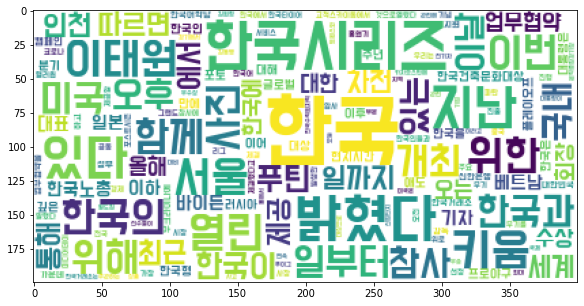

In [27]:
# 워드 클라우드 만들기

wc=WordCloud(font_path='BMDOHYEON_ttf.ttf', background_color='white')

plt.figure(figsize=(10,5)) # 크기조절

cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [28]:
# 하트모양으로 만들기
img = Image.open("하트.png") # 흰색에 가까울 수록 225 검은색은 0
img = np.array(img)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

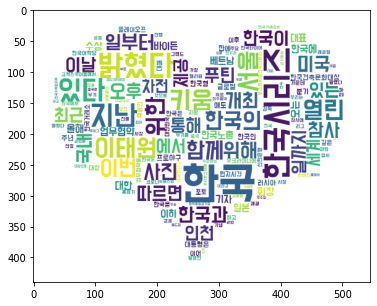

In [29]:
wc=WordCloud(font_path='BMDOHYEON_ttf.ttf', background_color='white', mask=img)

plt.figure(figsize=(10,5)) # 크기조절

cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)